# Testing layerwise clustering model

In [1]:
import torch
import torch.nn as nn
import numpy as np

import utils
from LayerwiseClustering import LayerwiseClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from model import My_VGG as Model
import matplotlib.pyplot as plt

In [2]:
X_train, y_train, X_test, y_test = utils.load_mnist()

### Create and train neural network

c:\users\jason\appdata\local\programs\python\python39\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 0 - Training loss: 0.2552113549055051
Epoch 1 - Training loss: 0.12319225242907526
Epoch 2 - Training loss: 0.11886884622445015
Epoch 3 - Training loss: 0.12810578706302467
Epoch 4 - Training loss: 0.04913193672050579

Training Time (in minutes) = 2.7396701693534853
Predicted Class = 5


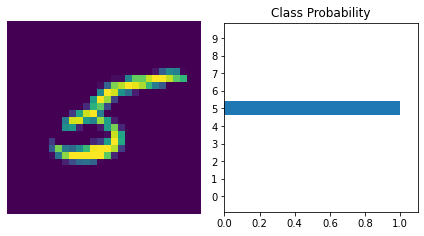

Number Of Images Tested = 10000

Model Accuracy = 0.9908


In [3]:
# FC network
# input_size = 784
# hidden_sizes = [128, 64]
# output_size = 10

# X_train = X_train.reshape(60000, -1)
# X_test = X_test.reshape(10000, -1)
# model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
#                       nn.ReLU(),
#                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
#                       nn.ReLU(),
#                       nn.Linear(hidden_sizes[1], output_size),
#                       nn.LogSoftmax(dim=1))

# CNN
model = Model(in_channels=1, in_size=28, num_classes=10)

model = utils.train_model(model, X_train, X_test, y_train, y_test, epochs=5)

transformer = PCA(n_components=200)
clusters = LayerwiseClustering(model, transformer)

In [4]:
#clusters.fit(X_train.reshape(X_train.shape[0], -1), y_train)

In [5]:
#clusters.predict(X_test.reshape(X_test.shape[0], -1))

### Plot TSNE Embedding of Outputs at Convolutional and Linear Layers

In [8]:
samples_per_class = 500 # Samples per class must be lower than the number of samples per class in the dataset
other_digit = 0
sample_digit = 1
epsilon = .1

other_digit_indices = np.where(y_test == other_digit)[0]
sample_digit_indices = np.where(y_test == sample_digit)[0]

data = np.concatenate((X_test[other_digit_indices[:samples_per_class]], 
                       X_test[sample_digit_indices[:samples_per_class]]), axis=0)
sample = X_test[sample_digit_indices[np.random.randint(0, samples_per_class)]]
labels = np.append(np.ones((1, samples_per_class), dtype=np.uint8) * other_digit, 
                   np.ones((1, samples_per_class), dtype=np.uint8) * sample_digit).squeeze()

# Flatten data (if necessary - NOT necessary for CNN)
# data = data.reshape(data.shape[0],-1)
# sample = sample.reshape(-1)

# Get adversarial samples
dataloader = utils.create_dataloader([sample], np.ones((1), dtype=np.uint8) * other_digit)
adv_samples = utils.add_adversarial_noise(model, dataloader, eps=epsilon)
sample = adv_samples[0]

Predicted Class = 5


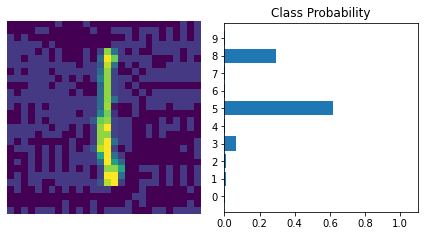

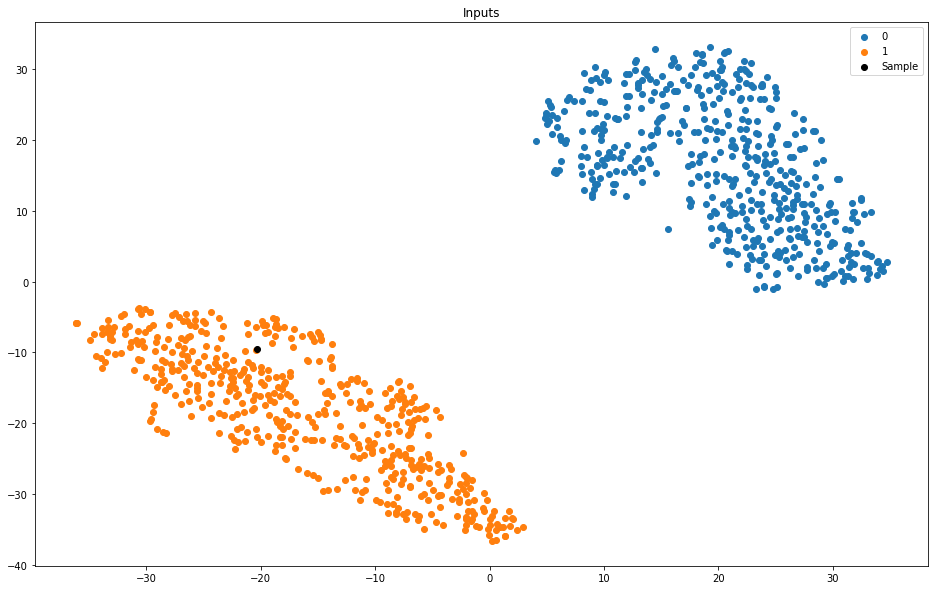

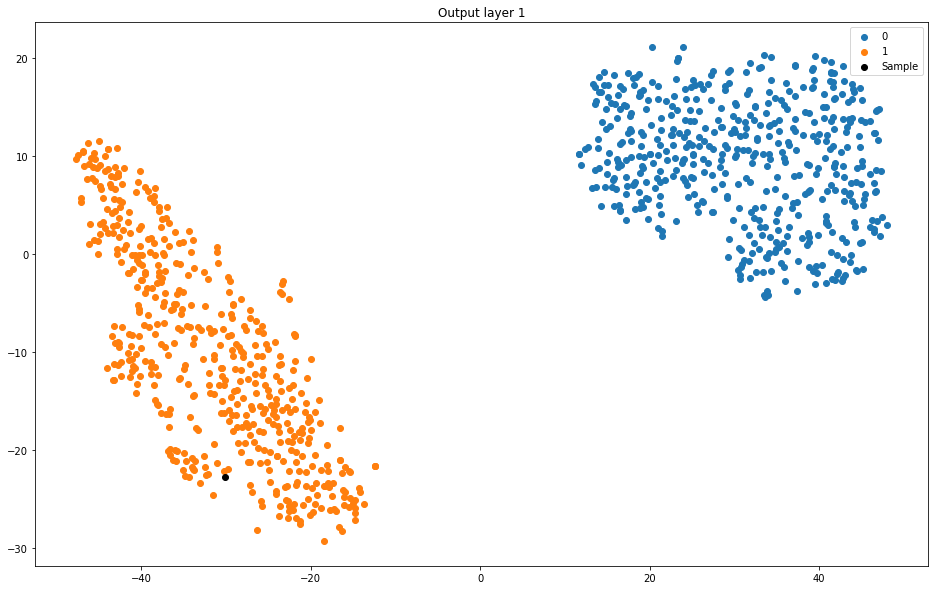

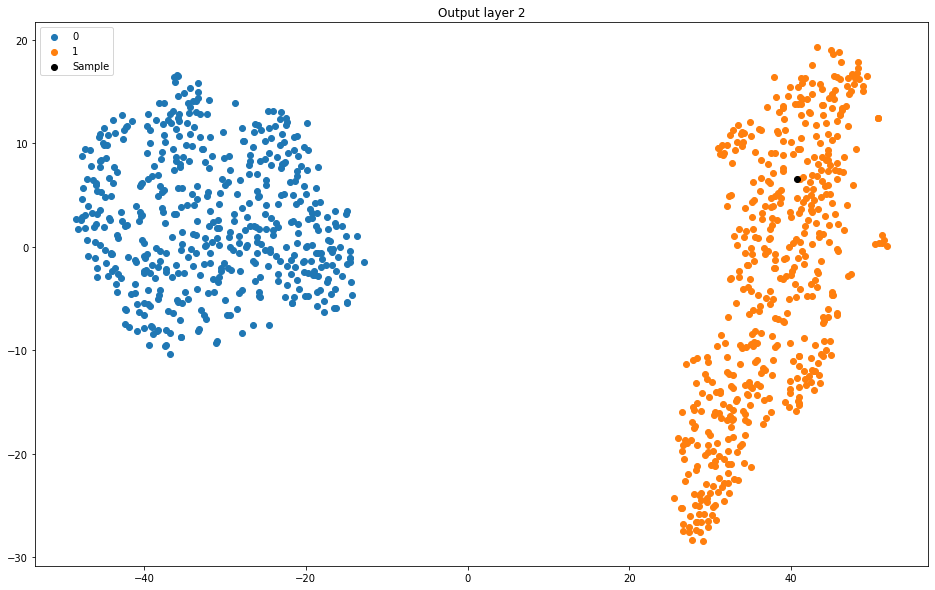

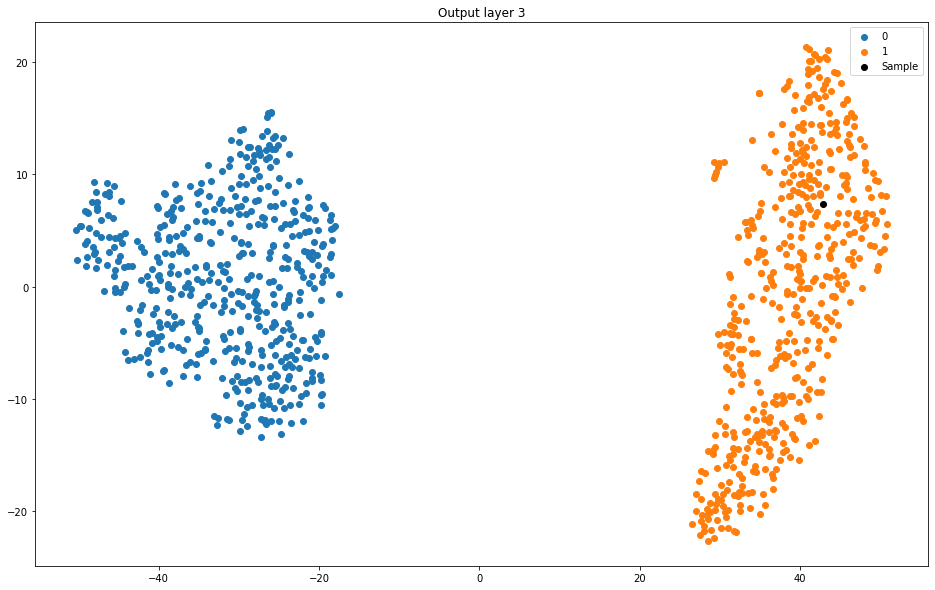

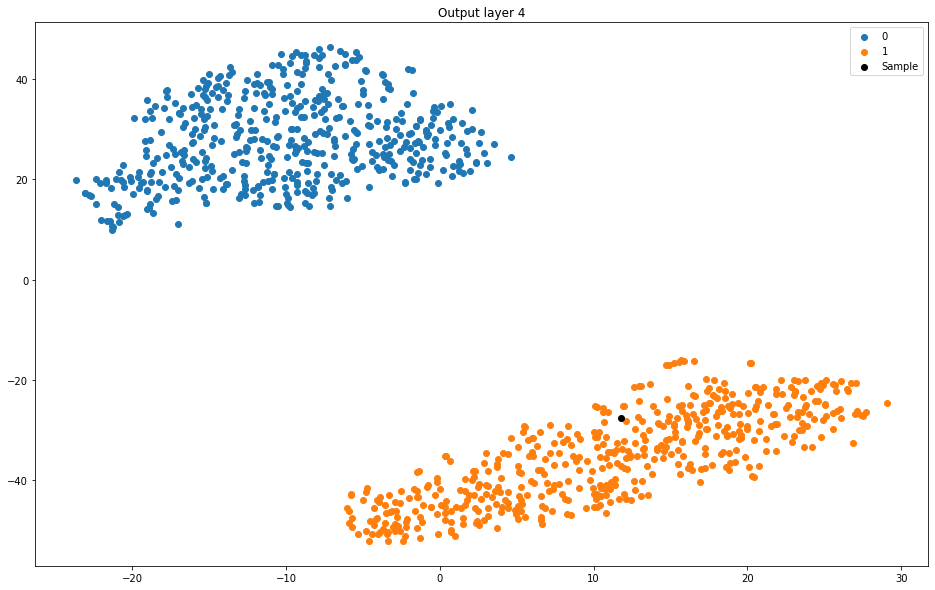

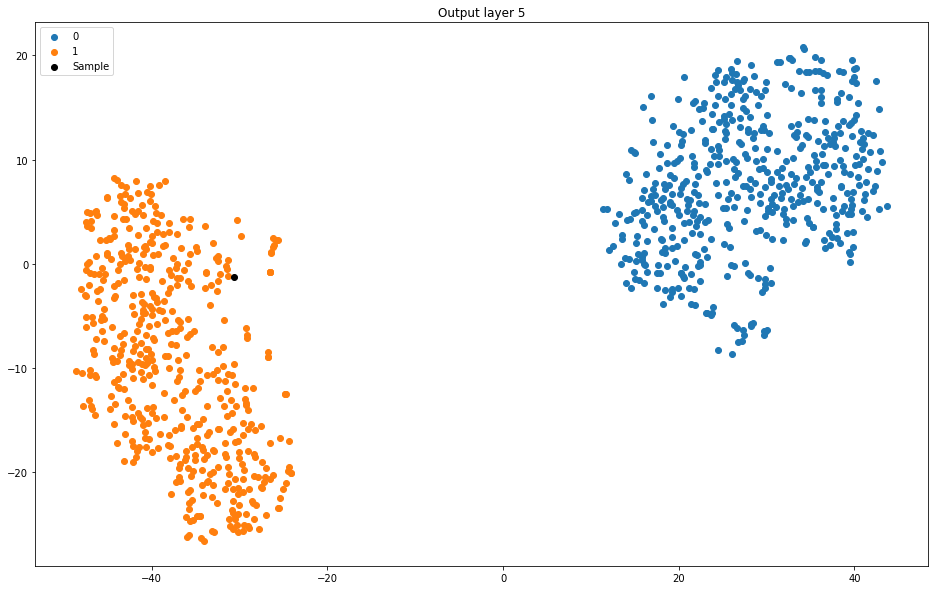

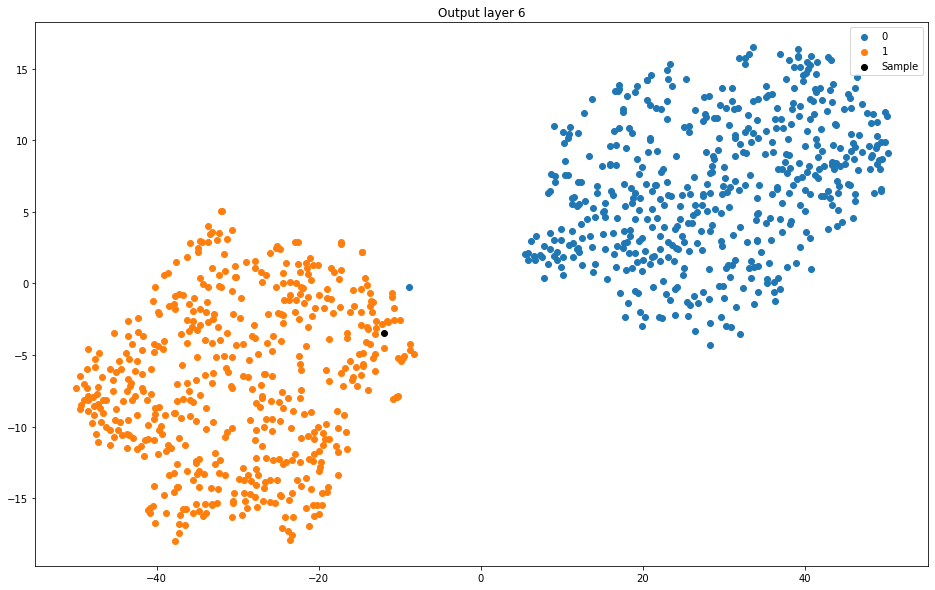

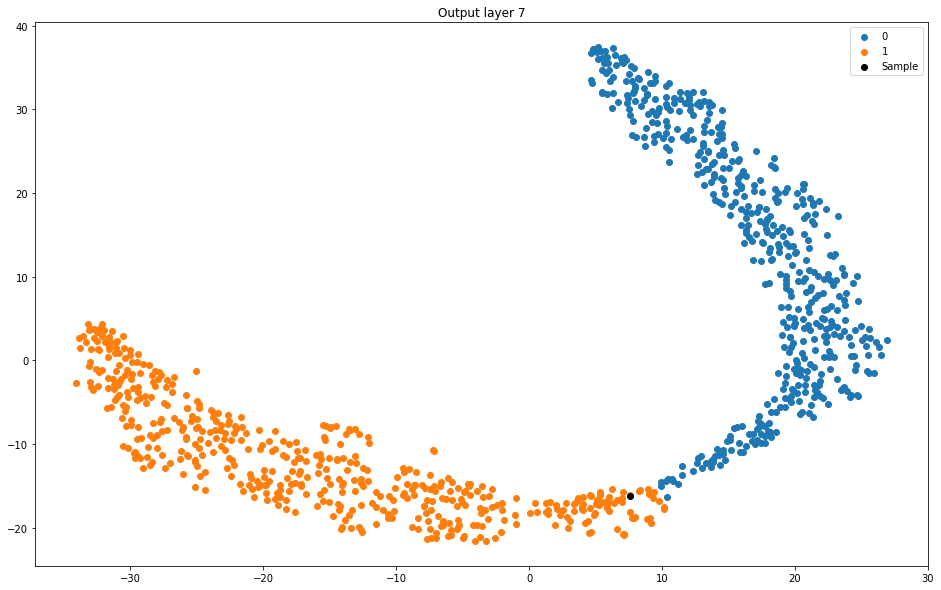

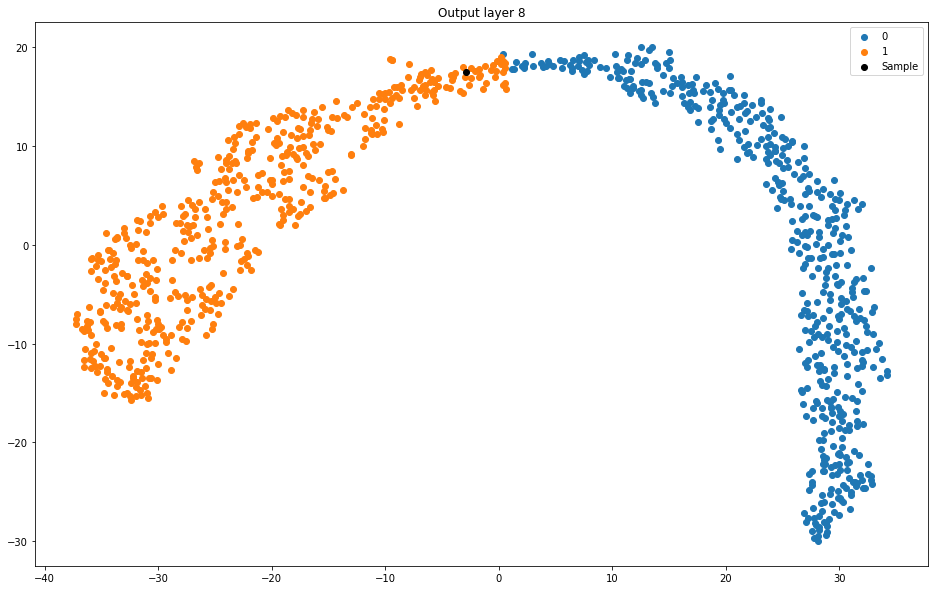

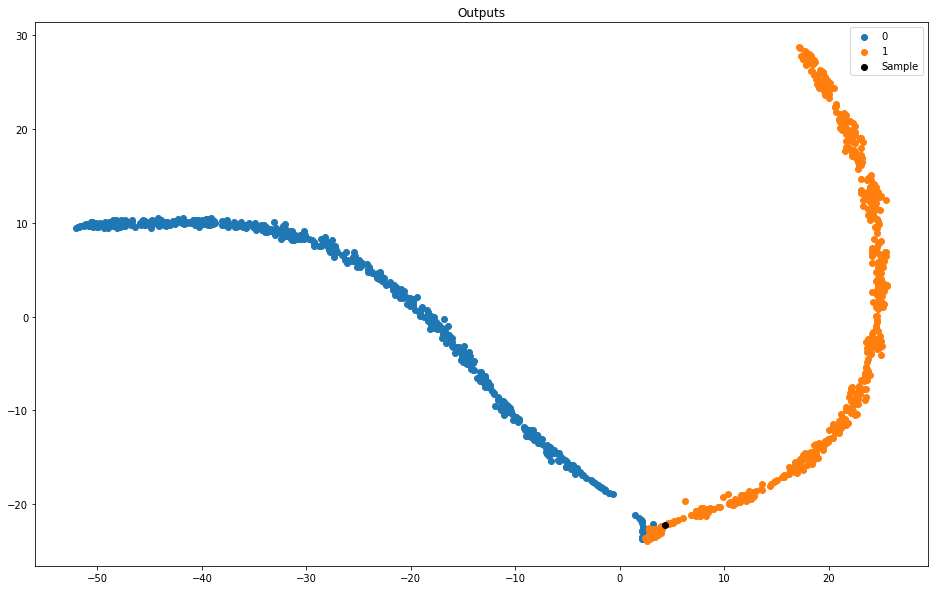

In [9]:
clusters.plotSampleInClusters(data, labels, sample)